In [129]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm

def sorted_list(path):
    tmplist = glob.glob(path)
    tmplist.sort()
    return tmplist

def show_data(npy):
    num_channel = npy.shape[-1]
    plt.figure(figsize=(3*num_channel, 5))
    for channel in range(num_channel):
        tmpimg = npy[:, :, channel]
        ax = plt.subplot(1, num_channel, channel+1)
        if channel == 0:
          ax.title.set_text("Ice Concentration(0~250)")
        elif channel == 1:
          ax.title.set_text('North Pole')
        elif channel == 2:
          ax.title.set_text('Coastline Mask')
        elif channel == 3:
          ax.title.set_text('Land Mask')
        else:
          ax.title.set_text('NULL VALUE')
        ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

In [96]:
PATH = '/content/drive/MyDrive/dacon/artic_ice'
train = pd.read_csv(PATH+'/train.csv')
sub = pd.read_csv(PATH+'/sample_submission.csv')
sub = sub.drop(columns = "136193")
list_train = sorted_list(os.path.join('/content/drive/MyDrive/dacon/artic_ice/train/', '*'))
train.head(2)

,month,file_nm
0,1978-11,197811.npy
1,1978-12,197812.npy


In [ ]:
data=[]
for files in tqdm(list_train):
    data.append(np.load(files))
data = np.array(data)

각 파일(*.npy)은 해빙 농도(0~250), 북극점(위성 관측 불가 영역), 해안선 마스크, 육지 마스크, 결측값 5개의 채널로 구성

각 채널은 (448*304)로 이루어져있음

In [44]:
tmpnpy = np.load(PATH+'/train/197811.npy')
tmpnpy.shape

(448, 304, 5)

이미지 예시

*북극점은 측정 불가이기에 채널1 중앙이 비어있는 것을 볼 수 있음

*즉 예측 시 채널1+채널2를 하면 됌

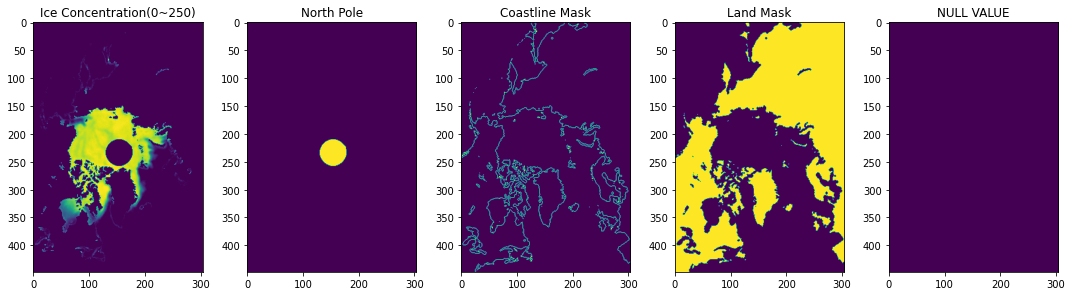

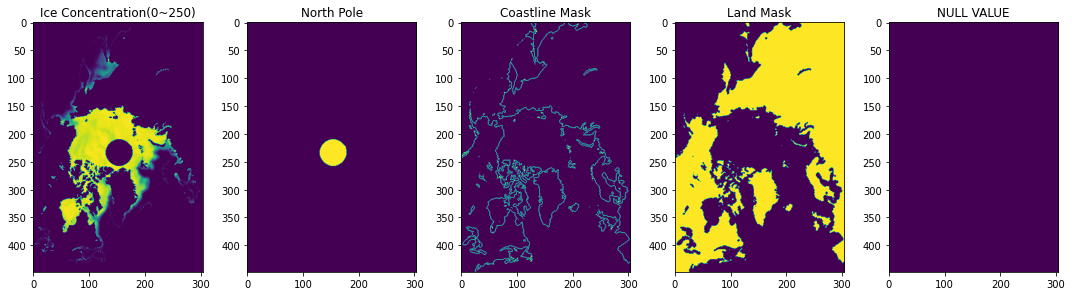

In [130]:
print()
for idx in range(train.shape[0]):
    name_npy = train['file_nm'].iloc[idx]
    tmpnpy = np.load(os.path.join(PATH+'/train', name_npy))
    show_data(npy=tmpnpy)
    if(idx == 1): break

Simple EDA

As time passes, sea-ace area near north pole increases



Text(0.5, 1.0, 'year:2001, month:4')

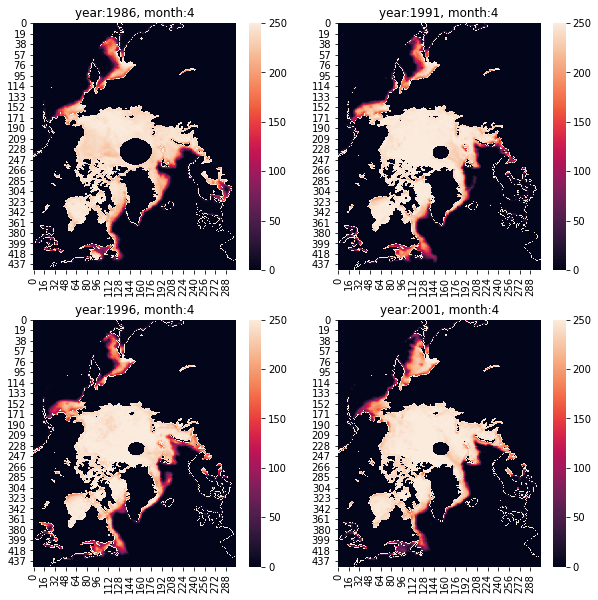

In [157]:
import seaborn as sns
axs = []
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10, 10)

for i in range(100,350, 60):
  axs.append(i)

print("As time passes, sea-ace area near north pole increases\n")
sns.heatmap(data[axs[0]][:,:,0]+ (data[axs[0]][:,:,2])*250, ax=ax1)
ax1.set_title('year:{}, month:{}'.format(1978+axs[0]//12,axs[0]%12))
sns.heatmap(data[axs[1]][:,:,0]+ (data[axs[1]][:,:,2])*250, ax=ax2)
ax2.set_title('year:{}, month:{}'.format(1978+axs[1]//12,axs[1]%12))
sns.heatmap(data[axs[2]][:,:,0]+ (data[axs[2]][:,:,2])*250, ax=ax3)
ax3.set_title('year:{}, month:{}'.format(1978+axs[2]//12,axs[2]%12))
sns.heatmap(data[axs[3]][:,:,0]+ (data[axs[3]][:,:,2])*250, ax=ax4)
ax4.set_title('year:{}, month:{}'.format(1978+axs[3]//12,axs[3]%12))

Possible Approach: ANN 딥러닝 모델 + 랜덤포레스트 + anomaly persistence model

In [ ]:
#implementation

Submission 설명 

2년치 데이터 = 24개월 데이터 예상해야 함

제일 첫번째 컬럼은 년-월, 나머지는 flatten한 448*304=136192

2d numpy를 펼칠 때 ravel, reshape(-1), flatten() 셋 중 사용

시간 비교했을 때 ravel()이 time-wise, memory-wise 제일 좋음



In [102]:
%time
for i in range(24):
  tmpnpy[:,:,0].ravel()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


In [103]:
sub.head(2)

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
